## Transformer

Attention模型 通过自注意力、多头注意力、前馈神经网络和跳跃连接等机制实现了对长序列的高效处理，广泛应用于自然语言处理、图像识别和生成等任务。

## Architecture

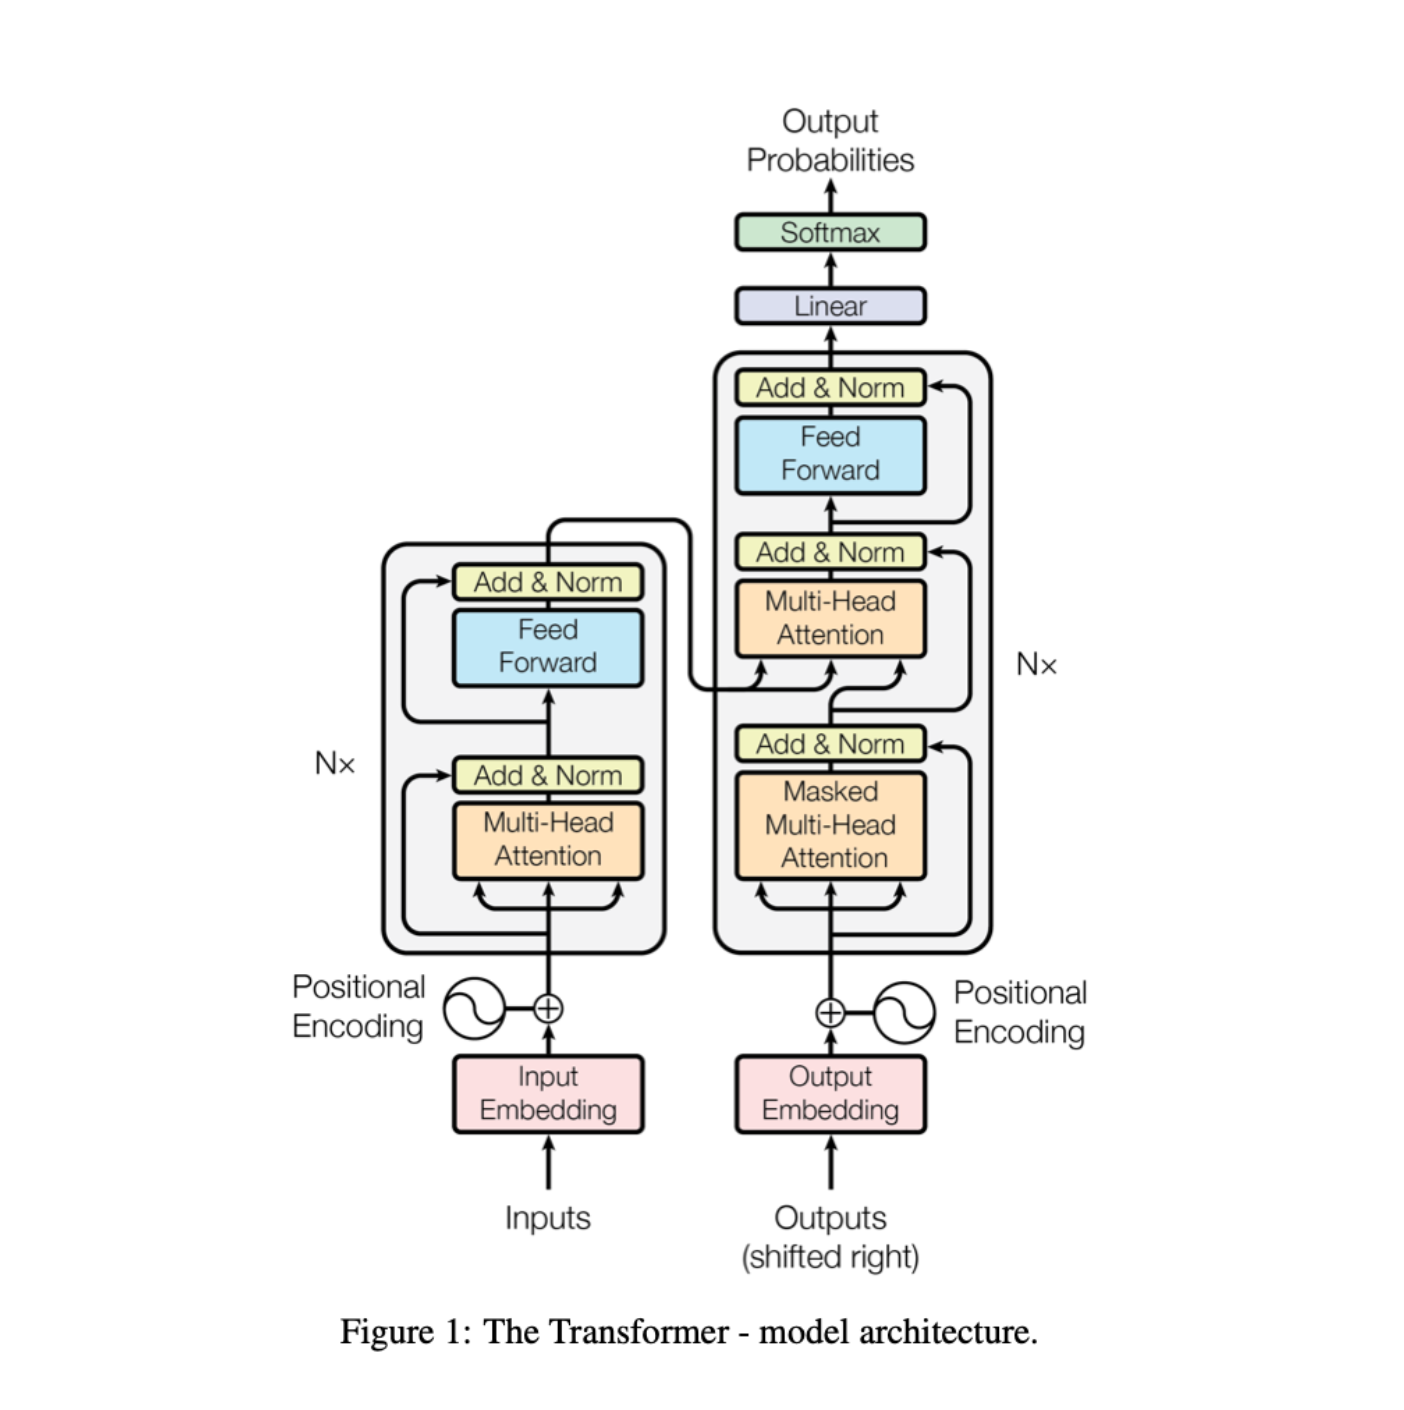

### 输入嵌入（Input Embedding）

输入嵌入层将每个词或元素表示为一个向量。这个向量化过程将离散的词或符号转换为一个高维空间中的连续表示。对于自然语言处理任务，这通常通过预训练的词嵌入（如Word2Vec、GloVe等）或基于任务的嵌入层实现。

### 位置编码（Positional Encoding）

由于Transformer模型不像传统的递归神经网络（RNN）那样处理序列信息，它本身没有内置的顺序感知能力。因此，Transformer通过添加位置编码来引入序列的顺序信息。位置编码通常是一种固定的、基于正弦函数的编码，它根据序列中的位置对输入的嵌入进行调整，帮助模型捕捉到单词或元素在序列中的相对位置。

位置编码使用两种不同的函数来处理每个位置的特征向量维度——正弦函数（sin）和余弦函数（cos）。公式如下：

$PE(\text{pos}, 2i) = \sin\left(\frac{\text{pos}}{10000^{\frac{2i}{d}}}\right)$

$PE(\text{pos}, 2i+1) = \cos\left(\frac{\text{pos}}{10000^{\frac{2i}{d}}}\right)$

其中的符号解释如下：

- $PE(\text{pos}, 2i)$ 和 $PE(\text{pos}, 2i+1)$ 分别表示第 $\text{pos}$ 个位置在第 $2i$ 和第 $2i+1$ 维度的编码值。
- $\text{pos}$ 是序列中元素的位置（例如，第一个单词的位置为 0，第二个单词的位置为 1，依此类推）。
- $i$ 是位置编码向量中的维度索引。Transformer模型中的位置编码是一个多维向量，不同的维度会有不同的编码值。
- $d$ 是位置编码向量的维度总数，通常与嵌入向量的维度大小一致（比如 512 维或 1024 维）。

### 注意力机制（Attention Mechanism）

Attention机制是整个架构的核心。最常用的一种形式是**“自注意力机制”**（Self-Attention），它允许模型根据输入序列的每个元素与其他元素之间的相关性来调整每个元素的表示。这个机制可以分为三个主要步骤：

查询（Query, Q）：这是当前处理的元素，我们想要知道它和序列中的其他元素的相关性。
键（Key, K）：这是序列中所有元素的特征，用来衡量与查询的相关性。
值（Value, V）：这些是序列中所有元素的实际值，会根据查询和键的相关性进行加权。

Query 是通过输入嵌入 $X$ 乘以可学习的权重矩阵 $W_Q$ 生成的。

Key 是通过输入嵌入 $X$ 乘以可学习的权重矩阵 $W_K$ 生成的。

Value 是通过输入嵌入 $X$ 乘以可学习的权重矩阵 $W_V$ 生成的。


### 相关性得分的计算：
首先，Transformer 模型中使用 Q（Query） 和 K（Key） 矩阵之间的点积来计算序列中每个位置的相关性得分，公式为：

$$ \text{Attention Scores} = \frac{Q \cdot K^T}{\sqrt{d_k}} $$

- Q 和 K 是通过线性变换生成的，代表了输入序列中每个位置的查询和键的表示。
- 通过点积运算，得到每个查询位置与所有键位置的相似度得分。这个得分矩阵的形状是 $n \times n$，其中 $n$ 是序列的长度。

例如，假设我们有一个 4 个位置的输入序列（$n = 4$），那么经过点积运算后，我们得到的得分矩阵可能类似于：

$$ \text{Scores} = \begin{bmatrix} 
1.2 & 0.5 & 1.8 & 0.3 \\
0.6 & 1.4 & 0.7 & 0.9 \\
1.1 & 0.4 & 1.5 & 0.2 \\
0.9 & 1.1 & 0.3 & 1.7 \\
\end{bmatrix} $$

其中，每一行代表某个位置的 Query 与所有位置（包括它自身）的 Key 的相关性得分。

#### Softmax 归一化：
Softmax 函数的作用是将这些得分转化为概率分布，确保所有注意力权重加起来为 1。这是通过以下公式实现的：

$$ \text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}} $$

其中：
- $z_i$ 是第 $i$ 个位置的得分（从点积中获得）。
- Softmax 将所有得分通过指数函数转换为正数，并进行归一化，使得所有权重之和等于 1。

##### 步骤：

1. **指数运算**：
   对每个位置的得分进行指数运算，以确保得分的正值特性：
   
   $$ e^{1.2}, e^{0.5}, e^{1.8}, e^{0.3} $$

   得到的结果分别是：
   
   $$ [e^{1.2} \approx 3.32, e^{0.5} \approx 1.65, e^{1.8} \approx 6.05, e^{0.3} \approx 1.35] $$

2. **归一化**：
   然后，将这些指数值归一化。归一化的过程是将每个数除以所有数的总和：
   
   $$ \sum_{j=1}^{n} e^{z_j} = 3.32 + 1.65 + 6.05 + 1.35 = 12.37 $$

   所以，第一个位置的权重计算为：
   
   $$ \frac{e^{1.2}}{\sum_{j=1}^{n} e^{z_j}} = \frac{3.32}{12.37} \approx 0.27 $$

   第二个位置的权重计算为：
   
   $$ \frac{e^{0.5}}{\sum_{j=1}^{n} e^{z_j}} = \frac{1.65}{12.37} \approx 0.13 $$

   依此类推，其他位置的权重计算为：

   $$ \frac{e^{1.8}}{\sum_{j=1}^{n} e^{z_j}} = \frac{6.05}{12.37} \approx 0.49 $$
   
   $$ \frac{e^{0.3}}{\sum_{j=1}^{n} e^{z_j}} = \frac{1.35}{12.37} \approx 0.11 $$

   所以，第一个 Query 对其他所有位置的注意力权重为：

   $$ \text{Attention Weights for Q1} = [0.27, 0.13, 0.49, 0.11] $$

#### 每个位置的权重如何作用于 Value：

Softmax 计算的注意力权重表示当前 Query 在对序列中各个位置的重要性分配。这些权重将用于对 V（Value） 矩阵中的值进行加权求和。每个 Query 的最终输出将是对所有位置的 Value 的加权和。

比如，假设我们有以下 Value 矩阵 $V$：

$$ V = \begin{bmatrix} 
0.1 & 0.2 & 0.3 \\
0.2 & 0.4 & 0.6 \\
0.3 & 0.5 & 0.7 \\
0.4 & 0.6 & 0.8 \\
\end{bmatrix} $$

将注意力权重应用到 Value 矩阵的各个位置进行加权求和：

$$ \text{Attention Output for Q1} = 0.27 \times V_1 + 0.13 \times V_2 + 0.49 \times V_3 + 0.11 \times V_4 $$

根据权重和 Value 矩阵的加权求和结果，得到 Query 1 的最终 Attention 输出。




### 前馈神经网络的结构：

在 Transformer 模型中的 **前馈神经网络（Feed-Forward Neural Network, FFN）** 是注意力机制的一个重要组成部分。它存在于每个 Transformer 编码器（encoder）和解码器（decoder） 的层内，并用于对注意力机制输出的特征进一步处理和变换。前馈神经网络的结构较为简单，但对提升模型的非线性表达能力至关重要。

在每个编码器或解码器层中，前馈神经网络通常包括两层全连接网络（或称为全连接层）和一个非线性激活函数，通常是 **ReLU（Rectified Linear Unit）**。具体来说，它的公式可以表示为：

$$
\text{FFN}(x) = \max(0, xW_1 + b_1)W_2 + b_2
$$

这里解释每个部分：
- $x$ 是来自注意力机制的输出或前一层的输出。
- $W_1$ 和 $W_2$ 是可学习的权重矩阵。
  - $W_1$ 的维度是 $(d_{\text{model}}, d_{\text{ff}})$，其中 $d_{\text{model}}$ 是输入的维度，$d_{\text{ff}}$ 是前馈层中隐藏层的维度，通常比 $d_{\text{model}}$ 更大（例如 2048）。
  - $W_2$ 的维度是 $(d_{\text{ff}}, d_{\text{model}})$，用于将隐藏层的输出映射回原来的维度 $d_{\text{model}}$。
- $b_1$ 和 $b_2$ 是相应的偏置项。
- **ReLU**：这是一个激活函数，用来引入非线性。它的公式是：
  $$
  \text{ReLU}(z) = \max(0, z)
  $$
  它把所有负值截断为 0，保留正值。

#### 前馈神经网络的详细过程：

1. **第一层线性变换**：
   输入 $x$ 经过第一个全连接层，线性变换如下：
   $$
   h = xW_1 + b_1
   $$
   - 这里 $x$ 是来自多头自注意力机制的输出（或来自前一层的输出），它的维度为 $d_{\text{model}}$。
   - 经过这个线性变换后，$x$ 被投影到一个更高维度的空间，维度为 $d_{\text{ff}}$。这个维度通常比 $d_{\text{model}}$ 更大，常见的设置是 2048。
   
2. **激活函数 ReLU**：
   通过激活函数 ReLU 来引入非线性：
   $$
   h_{\text{relu}} = \max(0, h)
   $$
   这一步的作用是将所有负值截断为 0，从而引入非线性，这对提升模型的表达能力至关重要。

3. **第二层线性变换**：
   激活后的输出再经过第二个全连接层，维度从 $d_{\text{ff}}$ 投影回 $d_{\text{model}}$：
   $$
   \text{FFN}(x) = h_{\text{relu}}W_2 + b_2
   $$
   - 经过这个线性变换后，维度恢复为 $d_{\text{model}}$，与原始输入的维度相同。这是因为 Transformer 模型中的所有输入和输出都保持在 $d_{\text{model}}$ 这个固定的维度上。

#### FFN的作用：
1. **提升非线性表达能力**：前馈神经网络通过激活函数引入了非线性，使得模型不仅能进行线性变换，还可以学习更加复杂的特征。
2. **特征变换和增强**：通过两个线性变换和中间的高维表示，FFN 可以对输入数据的特征进行充分的变换和增强，有助于模型在更高维度的特征空间中学习复杂的模式。
3. **独立地作用于每个位置**：前馈神经网络是位置无关的，意味着它独立地作用于每个位置的输入。这意味着它不会跨越时间步或序列中的位置进行交互，而是对每个位置单独进行非线性变换。

#### 前馈网络在编码器和解码器中的作用：
- 在 **编码器** 中，前馈神经网络的输入是多头自注意力机制的输出，经过前馈神经网络后再传递到下一层。
- 在 **解码器** 中，前馈神经网络同样接收来自注意力机制（自注意力和跨注意力）的输出，然后将变换后的结果传递给解码器的下一层。



### 填充掩码（Padding Masking）：

在自注意力机制（Self-Attention Mechanism）中，**Masking（遮蔽）** 是一个重要的技巧，它有助于模型在训练时控制哪些信息应该被忽略或被处理。**Masking** 通常有两种主要的应用场景：**填充掩码（Padding Masking）** 和 **序列掩码（Sequence Masking）**。这两种掩码的作用不同，但它们都是为了确保模型能够正确地处理输入序列中的无效信息或者防止模型窥探未来的信息。

#### 背景：
在自然语言处理任务中，输入序列通常具有不同的长度。例如，一个句子可能有 5 个单词，另一个句子可能有 10 个单词。为了使这些序列在模型中处理时具有相同的长度，通常会使用 **填充（Padding）** 来将较短的序列补充为相同长度。这些填充符号通常是某个特定的符号（例如 `[PAD]`），它们不携带任何有用的语义信息。

#### 问题：
在自注意力机制中，模型会计算每个位置的查询向量（Query）与所有其他位置的键向量（Key）之间的相关性得分。如果不加以区分，模型可能会错误地将填充符号与其他有效的词进行相关性计算，导致无效的注意力分布。

#### 填充掩码的作用：
为了避免这种问题，**填充掩码** 用于在注意力机制的计算中将这些填充的位置屏蔽掉，确保模型不会将填充符号作为有意义的信息进行处理。具体来说，填充掩码会在计算注意力得分之前，将填充符号对应的相关性得分设置为 **负无穷**，使得 Softmax 操作后，填充符号的位置对应的注意力权重为 0。

#### 填充掩码的具体操作：
假设我们有一个句子 `[I, like, this, movie, [PAD], [PAD]]`，输入序列的长度为 6，但实际内容只有 4 个词，后面 2 个是填充符号 `[PAD]`。

在计算自注意力时，填充掩码的作用如下：
- 对于任何 Query 来说，填充符号的相关性得分会被赋值为负无穷：
  $$
  \text{Attention Scores}(x_{\text{PAD}}) = -\infty
  $$
- 然后，经过 Softmax 处理后：
  $$
  \text{Attention Weights}(x_{\text{PAD}}) = 0
  $$
- 这样，模型在计算注意力时就不会将任何权重分配给填充符号，确保只关注有效的输入位置。

### 序列掩码（Sequence Masking）/ 未来信息掩码（Look-Ahead Masking）：

#### 背景：
在自回归模型（如语言建模或机器翻译解码器中），生成序列时，模型在每一步只应该基于当前已经生成的部分来预测下一个词，而不能看到未来的词。这种机制在训练过程中是特别重要的，因为输入的完整序列在训练时是已知的，但模型在生成时并不应该“偷看”后面的词。

#### 问题：
在计算解码器的自注意力时，每个位置都会计算它与所有位置之间的相关性。如果没有序列掩码，模型可能会看到将来还未生成的词，从而在训练阶段获得不公平的优势。这与实际的预测过程（即只能基于之前的信息生成下一个词）不一致。

#### 序列掩码的作用：
为了防止模型在生成当前词时看到未来的信息，**序列掩码**（也叫未来信息掩码或 Look-Ahead Masking）用于遮蔽掉当前词之后的所有位置，确保模型只能看到当前词及之前的词，而不能看到未来的词。具体来说，模型在计算某个位置的 Query 向量时，会将该位置之后的所有 Key 的相关性得分设置为 **负无穷**，以确保这些位置的注意力权重为 0。

#### 序列掩码的具体操作：
假设我们有一个输入序列 `["I", "like", "this", "movie"]`，在计算解码器第 3 个位置（对应词 "this"）的自注意力时，序列掩码会将第 3 个位置之后的词 "movie" 的注意力得分屏蔽掉。

- 对于第 3 个位置（"this"）的 Query 向量，它只能看到前两个词 "I" 和 "like"，并且它自己的注意力得分也会正常计算。
- 但第 4 个位置 "movie" 的相关性得分会被设为负无穷，确保 Softmax 之后对应的权重为 0：
  $$
  \text{Attention Scores}(x_{\text{future}}) = -\infty \quad \Rightarrow \quad \text{Attention Weights}(x_{\text{future}}) = 0
  $$

通过这种掩码，模型在训练时模拟了解码阶段的顺序生成过程，确保它在每一步只基于之前的词生成下一个词。

####  填充掩码和序列掩码的区别：

| **特性** | **填充掩码** | **序列掩码** |
|:-------:|:------------:|:-------------:|
| **用途** | 避免模型关注无效的填充符号 | 避免模型在生成时看到未来的词 |
| **应用场景** | 处理不同长度的序列时，屏蔽无效填充部分 | 训练生成任务（如机器翻译解码器）时，确保不能看到未来词 |
| **屏蔽对象** | 序列中填充的 `[PAD]` 符号 | 当前 Query 之后的所有位置（未来位置） |
| **作用** | 确保注意力分布只在有效的输入词上 | 确保模型只能基于过去和当前的信息预测下一个词 |

#### 总结：
- **填充掩码（Padding Masking）**：用于避免模型将注意力集中在无意义的填充符号上，确保注意力只关注有效的输入。
- **序列掩码（Sequence Masking）**：用于避免模型看到当前词之后的信息，确保模型只能在生成时使用之前的词。

这两种 Masking 技术是自注意力机制中的关键部分，它们确保模型在处理不规则长度的输入和生成任务时能够正确处理输入序列的无效信息或未来信息。

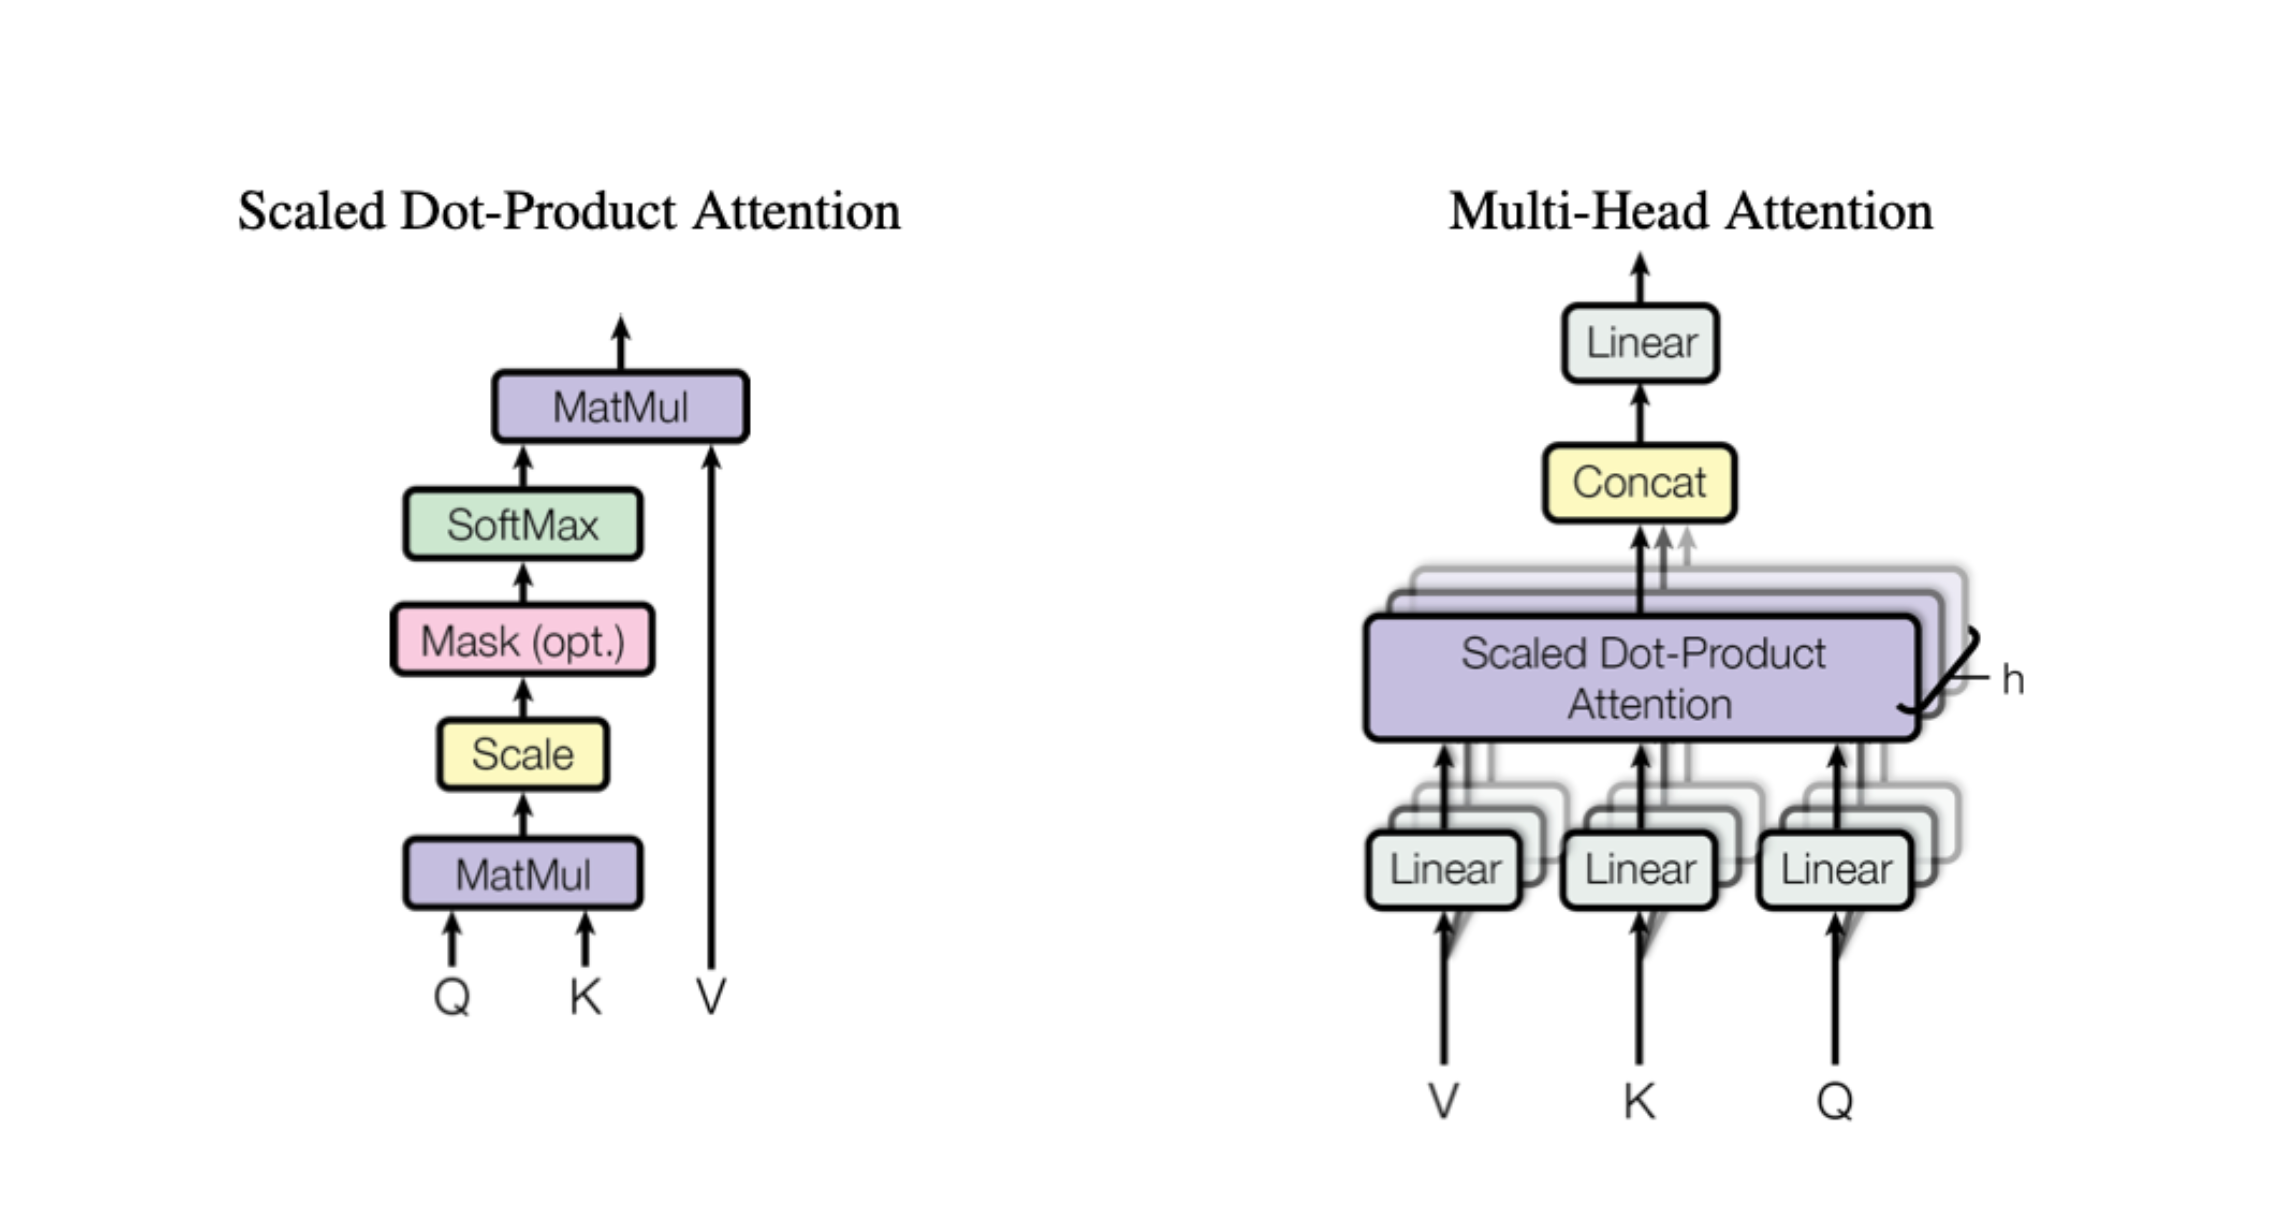

## Code

In [8]:
import tensorflow as tf
import numpy as np

In [4]:
class ScaledDotProductAttention(tf.keras.layers.Layer):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()
        
    def call(self, Q, K, V, mask):
        matmul_qk = tf.matmul(Q, K, transpose_b = True)
        
        dk = tf.cast(tf.shape(K)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
        
        if mask is not None:
            scaled_attention_logits += (mask * -1e9)
            
        attention_weights = tf.nn.softmax(scaled_attention_logits, axis = -1)
        
        output = tf.matmul(attention_weights, V)
        return output, attention_weights  
        

In [7]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        assert d_model % self.num_heads == 0
        self.depth = d_model // num_heads
        
        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)
        
        self.dense = tf.keras.layers.Dense(d_model)
        
        def split_heads(self, x, batch_size):
            x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
            return tf.transpose(x, perm=[0,2,1,3])
        
        
        def call(self, Q, K, V, mask):
            batch_size = tf.shape(Q)[0]
            
            Q = self.wq(Q)
            K = self.wk(K)
            V = self.wv(V)
            
            
            Q = self.split_heads(Q, batch_size)
            K = self.split_heads(K, batch_size) 
            V = self.split_heads(V, batch_size)
            
            scaled_attention, attention_weights = ScaledDotProductAttention()(Q, K, V, mask)
            scaled_attention = tf.transpose(scaled_attedtion, perm=[0,2,1,3])
            concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
            
            output = self.dense(concat_attention)
            return output, attention_weights   

In [10]:
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)
        
    def get_angles(self, pos, i, d_model):
        angle_rate = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model)) 
        return pos * angle_rates
    
    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(np.arange(position)[:, np.newaxis],
                                    np.arange(d_model)[np.newaxis,:],
                                    d_model)
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
        
        pos_encoding = angle_rads[np.newaxis, ...]
        return tf.cast(pos_encoding, dtype = tf.float32)
    
    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1],:]

In [11]:
def feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),
        tf.keras.layers.Dense(d_model)
        
    ])

In [13]:
class TransformerLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerLayer, self).__init__()
        
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = feed_forward_network(d_model, dff)
        
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)
        self.layernorm2 = tf.keras.layers.LayerNoRMALIZATION(epsilon = 1e-6)
        
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        
        
    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        return out2
    

In [16]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, rate=0.1):
        super(Transformer, self).__init__()
        
        self.d_model = d_model
        self.num_layers = numlayers
        
        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = PositionalEncoding(pe_input, d_model)
        
        self.enc_layers = [TransformerLayer(d_model, num_heads, dff, rate) for _ in range(num_Layers)]
        self.dropout = tf.keras.layers.Dropout(rate)
        self.final_layer = tf.keras.layers.Dense(target_vocab_size)
        
        
    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        # 添加嵌入与位置编码
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = self.pos_encoding(x)

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)

        return self.final_layer(x)

In [ ]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
input_vocab_size = 8500
target_vocab_size = 8500
droppout_rate = 0.1
max_position_encoding = 10000


transformer = Transformer(num_layers, d_model, num_heads, dff,
                         input_vocab_size, target_vocab_size,
                         pe_input=max_position_encoding,
                         pe_target = max_positin_encoding,
                         rate=dropout_rate)


input_seq = tf.random.uniform((32, 100), dtype = tf.int64, minval=0, maxval=200)
mask = None

output = transformer(input_seq, training=False, mask=mask)
print(output.shape)